In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#Load the dataset
data = pd.read_csv('creditcard.csv')

In [3]:
#Preprocess the dataset
#Normalize the 'Amount' column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1, 1))

In [4]:
# Drop the 'Time' column
data.drop('Time', axis=1, inplace=True)

In [5]:
#Split the dataset into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']

#Set feature names for X
X.columns = [f'feature_{i}' for i in range(X.shape[1])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Train the Isolation Forest model
clf = IsolationForest(contamination=float(y_train.sum()) / len(y_train), random_state=42)
clf.fit(X_train)

C:\Users\Professional\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001729245759178389, random_state=42)

In [7]:
#Evaluate the model
y_pred_train = clf.predict(X_train)
y_pred_train = [1 if pred == -1 else 0 for pred in y_pred_train]

y_pred_test = clf.predict(X_test)
y_pred_test = [1 if pred == -1 else 0 for pred in y_pred_test]

print("Training set accuracy: {:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Test set accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_test)))

print("Confusion Matrix (Test set):")
print(confusion_matrix(y_test, y_pred_test))

print("Classification Report (Test set):")
print(classification_report(y_test, y_pred_test))

Training set accuracy: 0.997
Test set accuracy: 0.997
Confusion Matrix (Test set):
[[56788    76]
 [   73    25]]
Classification Report (Test set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.26      0.25        98

    accuracy                           1.00     56962
   macro avg       0.62      0.63      0.62     56962
weighted avg       1.00      1.00      1.00     56962



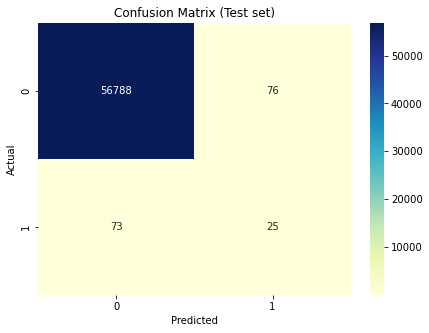

In [8]:
#Visualize the results
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test set)')
plt.show()